In [3]:
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, EstimatorV2 as Estimator
from qiskit.visualization import  plot_histogram

 
# Bell Circuit
qc = QuantumCircuit(127,8)
qc.h([0,16,55,75])
qc.cx([0,16,55,75],[126,26,68,90])

qc.measure([0,126],[0,1])
qc.measure([16,26],[2,3])
qc.measure([55,68],[4,5])
qc.measure([75,90],[6,7])

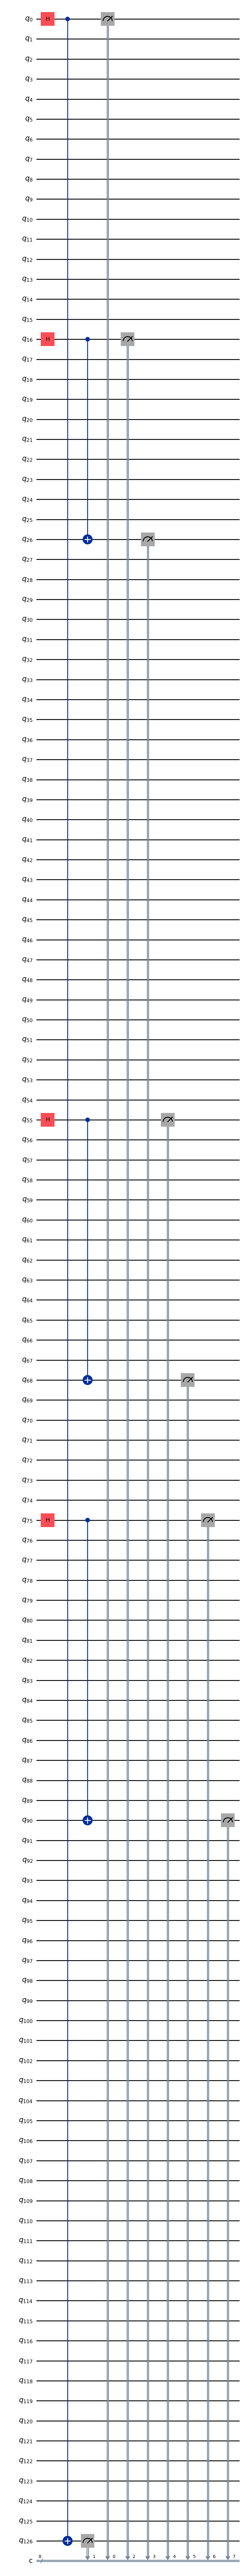

In [4]:
qc.draw("mpl", style="iqp")

In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Load saved credentials
service = QiskitRuntimeService(name="xuy")

In [ ]:
# Run the sampler job locally using ibm_cleveland
backend = service.backend("ibm_cleveland")
sampler = Sampler(backend)


pm = generate_preset_pass_manager(backend=backend, optimization_level=0)
isa_qc = pm.run(qc)


 #Run sampler
job = sampler.run([isa_qc],shots=4096).result()
pub_result = result_sam[0]




In [27]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q-ccf/cleveland-access/edu--cc-caregive',
    token='cdf9b9daff6e97da8251bab4881ad0e7225af65946ca3f7e127fa3e4709ff8f15e34a8d45aba9936e77fa455b9d426546c6b62dda33b95b996237eb100b43aee'
)
job = service.job('crgv06rytv7g0081gfwg')
job_result = job.result()

for idx, pub_result in enumerate(job_result):
    print(f"Sample data for pub {idx}: {pub_result.data.c.get_counts()}")

Sample data for pub 0: {'00111000': 13, '11111101': 51, '01101000': 2, '10000011': 5, '11110100': 9, '00001111': 45, '00000011': 57, '00000000': 50, '00010010': 50, '11110011': 61, '00001010': 12, '00011100': 43, '00100010': 50, '11111100': 40, '00111110': 53, '01010001': 8, '11101000': 15, '00100001': 45, '00010011': 52, '11110010': 54, '01111001': 2, '00100110': 12, '00110001': 48, '00011110': 49, '00110110': 8, '11100011': 40, '11000111': 12, '11011110': 42, '11100010': 59, '11000000': 53, '01000000': 4, '11000001': 41, '00101001': 14, '11000011': 60, '11010001': 47, '11001001': 15, '11000010': 50, '00110011': 60, '00011111': 53, '11111110': 43, '00110000': 61, '11110000': 46, '00111101': 53, '00010001': 47, '01001110': 2, '00000100': 11, '11101111': 52, '00000001': 48, '01101100': 6, '00011101': 42, '11001011': 12, '11010011': 45, '11111111': 51, '11000110': 10, '11111000': 11, '10001011': 1, '00100011': 57, '01101110': 5, '10100001': 6, '11000100': 10, '11110110': 4, '10010010': 6

Measurement Counts:
{'00111000': 13, '11111101': 51, '01101000': 2, '10000011': 5, '11110100': 9, '00001111': 45, '00000011': 57, '00000000': 50, '00010010': 50, '11110011': 61, '00001010': 12, '00011100': 43, '00100010': 50, '11111100': 40, '00111110': 53, '01010001': 8, '11101000': 15, '00100001': 45, '00010011': 52, '11110010': 54, '01111001': 2, '00100110': 12, '00110001': 48, '00011110': 49, '00110110': 8, '11100011': 40, '11000111': 12, '11011110': 42, '11100010': 59, '11000000': 53, '01000000': 4, '11000001': 41, '00101001': 14, '11000011': 60, '11010001': 47, '11001001': 15, '11000010': 50, '00110011': 60, '00011111': 53, '11111110': 43, '00110000': 61, '11110000': 46, '00111101': 53, '00010001': 47, '01001110': 2, '00000100': 11, '11101111': 52, '00000001': 48, '01101100': 6, '00011101': 42, '11001011': 12, '11010011': 45, '11111111': 51, '11000110': 10, '11111000': 11, '10001011': 1, '00100011': 57, '01101110': 5, '10100001': 6, '11000100': 10, '11110110': 4, '10010010': 6, '

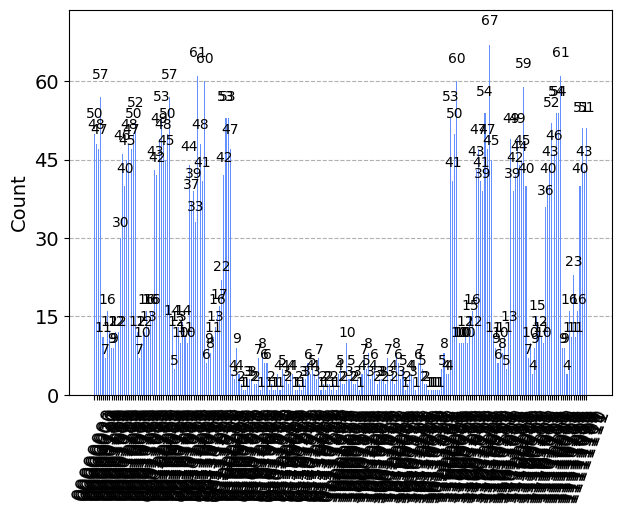

In [37]:
from qiskit.visualization import  plot_histogram

#Get the counts from result_sam

counts = pub_result.data.c.get_counts()  # Get the counts dictionary

# Print the measurement counts
print("Measurement Counts:")
print(counts)

# Visualize the measurement counts as a histogram
plot_histogram(counts)


In [34]:
print(pub_result.data.c)

BitArray(<shape=(), num_shots=4096, num_bits=8>)


In [39]:
from qiskit.result import Result
import numpy as np

# # Assuming `primitive_result` is the PrimitiveResult object you obtained
# result_dict = job_result.to_dict()
# result = Result.from_dict(result_dict)
# counts = result.get_counts()

# Get the BitArray containing the measurement results
data_bin = job_result[0].data  # Access the DataBin property
bit_array = data_bin.c  # Access the BitArray from the DataBin

# Specify the indices of the classical bits you want to extract
# Indices start from 0
bit_indices = [2, 5]  # Example: Extract results from bits 3 and 6 (indices 2 and 5)

# Extract the results for the specified classical bits
extracted_bits = []
for shot_result in bit_array.to_numpy():
    shot_bits = ''.join([str(int(shot_result[i])) for i in bit_indices])
    extracted_bits.append(shot_bits)

# Print the extracted results
print("Extracted results for classical bits:", bit_indices)
print(extracted_bits)

AttributeError: 'BitArray' object has no attribute 'to_numpy'

In [33]:
filtered_bit_array = pub_result.data.c[:, 1]

TypeError: 'BitArray' object is not subscriptable

In [3]:
print (job_result)

PrimitiveResult([PubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=8>)), metadata={'circuit_metadata': {}})], metadata={'version': 2})


In [7]:
for idx, pub_result in enumerate(job_result):
     meas1 = pub_result.data.get_counts([1,2])

AttributeError: 'DataBin' object has no attribute 'get_counts'

In [17]:
from qiskit.primitives import BitArray
from qiskit.result import Result
# from qiskit.quantum_info import BitArray

# Create a new BitArray object
# bit_array = BitArray(8)  # Creates a BitArray with 4 bits, all initialized to 0
# bit_array = BitArray()

for idx, pub_result in enumerate(job_result):
     meas = pub_result.data.BitArray(job_result,8)

AttributeError: 'DataBin' object has no attribute 'BitArray'

In [26]:
from qiskit.result import Result

# Assuming `primitive_result` is the PrimitiveResult object you obtained
for idx, pub_result in enumerate(job_result):
    result = Result.from_binary(pub_result.data.to_binary())
    counts = result.get_counts()

# Print the measurement counts
print("Measurement Counts:")
for bit_string, count in counts.items():
    print(f"{bit_string}: {count}")

# Get the BitArray containing the measurement results
bit_array = result.get_memory()

# Print the BitArray
print("\nMeasurement Results (BitArray):")
print(bit_array)

# Access individual shots and classical bit values
num_shots = bit_array.shape[0]
num_clbits = bit_array.shape[1]

print("\nIndividual Shots and Classical Bit Values:")
for shot_idx in range(num_shots):
    shot_result = bit_array[shot_idx]
    print(f"Shot {shot_idx}: {shot_result.tolist()}")
    for clbit_idx in range(num_clbits):
        print(f"Classical Bit {clbit_idx}: {int(shot_result[clbit_idx])}")
    print()

AttributeError: type object 'Result' has no attribute 'from_binary'

In [ ]:
from qiskit.result import Result